Workgroup 2

# Potential Outcomes and RCTs

#### Group 3: Dube, V., Garay, E. Guerrero, J., Villalba, M.

## Multicolinearity

What is Multicollinearity?

In [ ]:
# Example

## Analyzing RCT data with precision adjustment

## A crash course in good and bad controls (val)

In this section, we will explore different scenarios where we need to decide whether the inclusion of a control variable, denoted by _Z_, will help (or not) to improve the estimation of the **average treatment effect** (ATE) of treatment _X_ on outcome _Y_. The effect of observed variables will be represented by a continuous line, while that of unobserved variables will be represented by and discontinuous line.

In [2]:
# Libraries
import pandas as pd, numpy as np, statsmodels.api as sm, statsmodels.formula.api as smf
import sympy, matplotlib, math, random, networkx
from causalgraphicalmodels import CausalGraphicalModel
from statsmodels.iolib.summary2 import summary_col

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### Model 1: Good control (Blocking back-door paths)

For model 1, we will asume that _Z_ stands for...

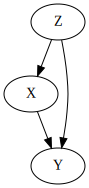

In [3]:
sprinkler = CausalGraphicalModel(nodes=["Z","Y","X"],
                                 edges=[("X","Y"),
                                        ("Z","X"),
                                        ("Z","Y")])
sprinkler.draw()

In [4]:
np.random.seed(42) # set MC seed

# Generate data
n = 1000 # sample size
Z = np.random.normal(0,1, 1000).reshape((1000, 1))
X = 5 * Z + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + 1.5 * Z + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((Z, X, Y))
data = pd.DataFrame(D, columns = ["Z", "X", "Y"])

In [5]:
# Regressions
no_control = smf.ols("Y ~ X", data=data).fit()         # Wrong, not controlling by the confounder Z
using_control = smf.ols("Y ~ X + Z", data=data).fit() # Correct

# Summary results
dfoutput = summary_col([no_control, using_control], stars=True)
print(dfoutput)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

                  Y I       Y II  
----------------------------------
Intercept      -0.0144   0.0061   
               (0.0326)  (0.0312) 
R-squared      0.9748    0.9771   
R-squared Adj. 0.9748    0.9771   
X              1.2942*** 0.9898***
               (0.0066)  (0.0312) 
Z                        1.5727***
                         (0.1582) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
